# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# Dr. Ryan @STEMplicity



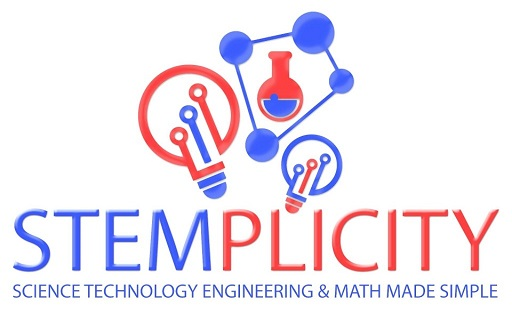

# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [7]:
# imporar las 4 bibliotecas básicas
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [8]:
# leer el 'Bank_Customer_retirement.csv'
bank_df = pd.read_csv('Bank_Customer_retirement.csv')

In [9]:
# mostrar las claves del dataframe 
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [10]:
bank_df.shape

(500, 4)

In [12]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [13]:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

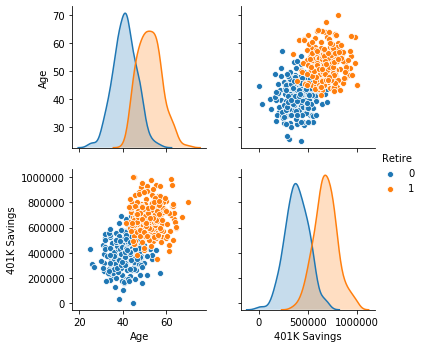

In [14]:
sns.pairplot(bank_df, hue = 'Retire', vars = ['Age', '401K Savings'] )

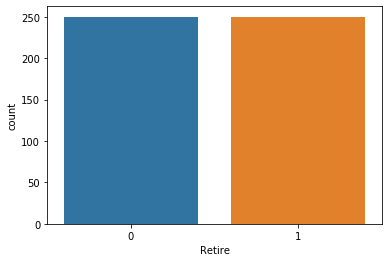

In [15]:
sns.countplot(bank_df['Retire'], label = "Retire") 

# STEP #4: MODEL TRAINING 

In [19]:
# eliminar la columna 'Customer ID'
bank_df.drop(['Customer ID'], axis=1, inplace=True)

In [21]:
# Let's drop the target label coloumns
X = bank_df.drop(['Retire'],axis=1)

In [22]:
X

,Age,401K Savings
0,39.180417,322349.87400
1,56.101686,768671.57400
2,57.023043,821505.47180
3,43.711358,494187.48500
4,54.728823,691435.77230
5,50.499789,742398.90680
6,39.573302,578650.31560
7,55.159309,533821.20110
8,30.791271,459592.40840
9,40.456073,396800.25090


In [24]:
y = bank_df['Retire']
y

0      0
1      1
2      1
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    1
476    1
477    0
478    0
479    1
480    1
481    1
482    0
483    1
484    1
485    0
486    0
487    0
488    1
489    0
490    1
491    1
492    0
493    1
494    0
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [25]:
# importar la función para dividir el dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [26]:
X_train.shape

(400, 2)

In [27]:
X_test.shape

(100, 2)

In [28]:
y_train.shape

(400,)

In [29]:
y_test.shape

(100,)

In [30]:
# importar la clase SVC del paquete sklearn.svm
# importar classification_report, confusion_matrix de sklearn.metrics

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# STEP #5: EVALUATING THE MODEL

In [31]:
# Obtener y-hat
# Obtener la matriz de confusión
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

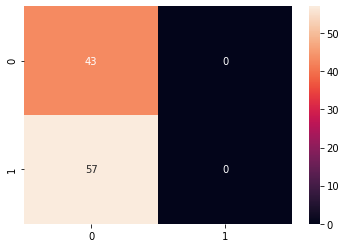

In [32]:
sns.heatmap(cm, annot=True)

In [34]:
# mostrar el classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



# STEP #6: IMPROVING THE MODEL

In [38]:
min_train = X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [39]:
range_train = (X_train - min_train).max()
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [42]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
47,0.588172,0.425905
9,0.365235,0.396794
278,0.692734,0.674955
336,0.170522,0.175254
302,0.514624,0.645350


In [43]:
y_train

247    1
390    1
186    1
484    1
139    0
47     1
9      0
278    1
336    0
302    1
117    0
327    1
53     0
101    0
458    1
285    1
184    1
393    1
421    0
358    0
230    1
435    1
132    1
49     0
224    0
111    1
262    1
317    0
352    0
470    0
      ..
468    0
30     0
431    0
65     0
203    0
205    1
44     0
27     1
80     0
437    0
113    0
399    0
204    0
7      1
208    1
158    1
112    1
411    1
446    0
231    0
228    0
8      0
73     0
400    0
118    1
486    0
189    0
495    1
206    1
355    0
Name: Retire, Length: 400, dtype: int64

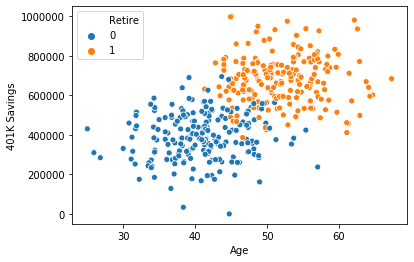

In [44]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)

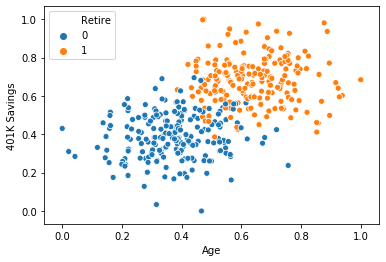

In [45]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [46]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [47]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

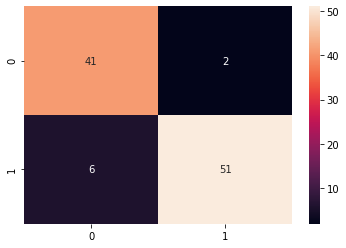

In [48]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot=True,fmt="d")

In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        57

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



# IMPROVING THE MODEL - PART 2

In [50]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [37]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [38]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
grid_predictions = grid.predict(X_test_scaled)

In [41]:
cm = confusion_matrix(y_test, grid_predictions)

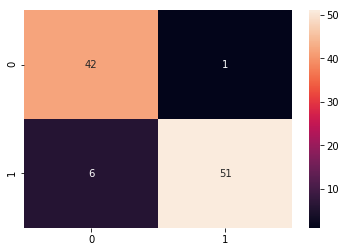

In [42]:
sns.heatmap(cm, annot=True)

             precision    recall  f1-score   support

          0       0.88      0.98      0.92        43
          1       0.98      0.89      0.94        57

avg / total       0.94      0.93      0.93       100



# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!